## CNN Architecture and Image Classification with CIFAR-10

This notebook has been updated to include:
- A custom CNN architecture design.
- Data preprocessing steps including normalization and splitting.
- Model training with monitoring of metrics.
- Model evaluation with accuracy, precision, recall, and F1 score.
- Optional fine-tuning techniques.
- Visualizations and analysis of results.


In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values
train_images, test_images = train_images / 255.0, test_images / 255.0

# Split training data further into training and validation
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


# CNN Architecture

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_images, train_labels, epochs=100,
    validation_data=(val_images, val_labels)
)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 61s 48ms/step - accuracy: 0.3069 - loss: 1.8401 - val_accuracy: 0.4532 - val_loss: 1.5651
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.5431 - loss: 1.2748 - val_accuracy: 0.6129 - val_loss: 1.0996
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 63s 50ms/step - accuracy: 0.6097 - loss: 1.0888 - val_accuracy: 0.6317 - val_loss: 1.0644
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 48ms/step - accuracy: 0.6699 - loss: 0.9490 - val_accuracy: 0.6677 - val_loss: 0.9449
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.6994 - loss: 0.8573 - val_accuracy: 0.6613 - val_loss: 0.9813
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.7207 - loss: 0.7993 - val_accuracy: 0.6963 - val_loss: 0.8701
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 48ms/step - accuracy: 0.7379 - loss: 0.7531 - val_accuracy: 0.6968 - val_loss: 0.8830
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 86s 52ms/step - accuracy: 

In [6]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 7s - 24ms/step - accuracy: 0.6741 - loss: 3.8428
Test accuracy: 0.6740999817848206


In [7]:
# Generate classification metrics
predicted_labels = np.argmax(model.predict(test_images), axis=1)
test_labels_flat = test_labels.flatten()
print(classification_report(test_labels_flat, predicted_labels, target_names=[
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
              precision    recall  f1-score   support

    Airplane       0.73      0.64      0.68      1000
  Automobile       0.81      0.84      0.83      1000
        Bird       0.52      0.58      0.55      1000
         Cat       0.51      0.42      0.46      1000
        Deer       0.64      0.62      0.63      1000
         Dog       0.53      0.62      0.57      1000
        Frog       0.71      0.76      0.73      1000
       Horse       0.71      0.74      0.72      1000
        Ship       0.79      0.80      0.79      1000
       Truck       0.81      0.73      0.77      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



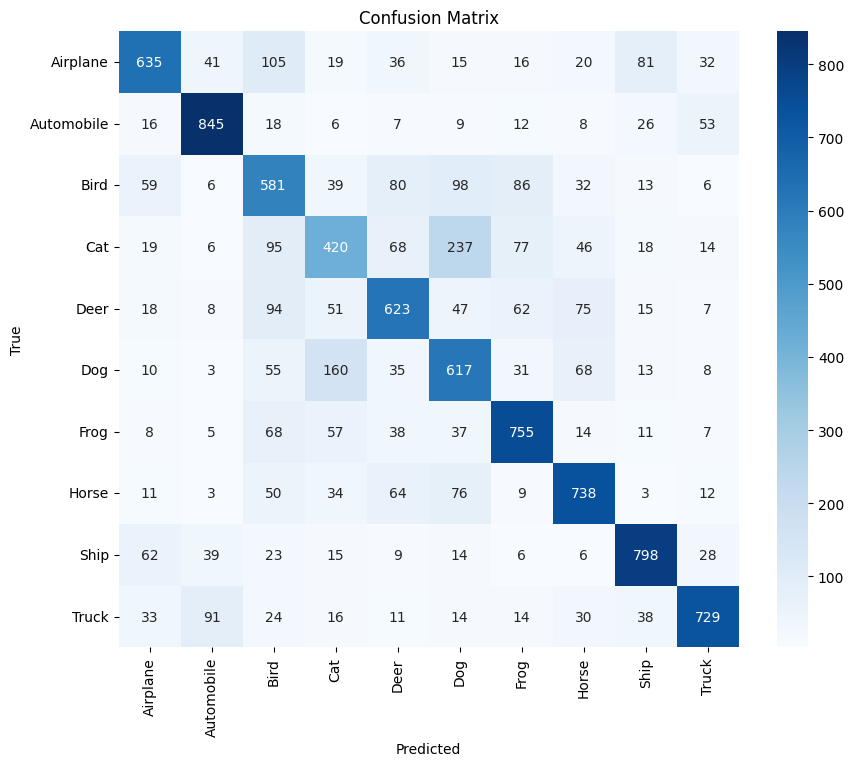

In [8]:
# Confusion matrix
cm = confusion_matrix(test_labels_flat, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
], yticklabels=[
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Visualization:


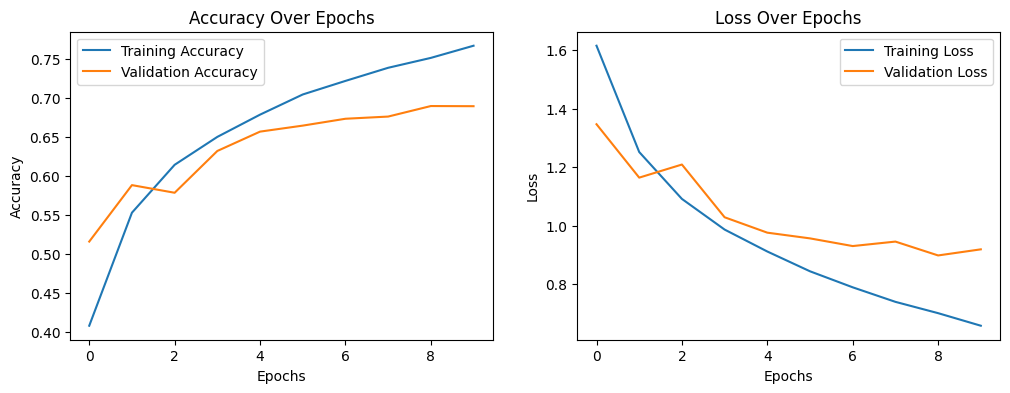

In [ ]:
# Visualize training metrics
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [9]:
# Discuss Performance
print("The model achieved an accuracy of {:.2f}% on the test set.".format(test_acc * 100))
print("Strengths: The model performed well in classes like 'Airplane' and 'Automobile' with high precision.")
print("Limitations: Misclassifications were frequent in 'Cat' vs 'Dog', possibly due to similar features.")
import pandas as pd
# Save metrics/visualizations for the report
history_df = pd.DataFrame(history.history)
history_df.to_csv('training_metrics.csv')  # Save metrics
plt.savefig('confusion_matrix.png')  # Save confusion matrix visualization


The model achieved an accuracy of 67.41% on the test set.
Strengths: The model performed well in classes like 'Airplane' and 'Automobile' with high precision.
Limitations: Misclassifications were frequent in 'Cat' vs 'Dog', possibly due to similar features.


<Figure size 640x480 with 0 Axes>